In [1]:
## Print the working directory on this computer
pwd()

"/Users/arindambose/Documents/julia"

In [4]:
## list the files in the working directory
readdir()

13-element Array{ByteString,1}:
 ".ipynb_checkpoints"            
 "GTD-Export.csv"                
 "Tutorial.jl"                   
 "cofreewy.txt"                  
 "health.csv"                    
 "juliamaterials.ipynb"          
 "learnJlsanders.ipynb"          
 "learning.jl"                   
 "learningJulia.ipynb"           
 "myplot.png"                    
 "terrorism-analysis-julia.ipynb"
 "testing.jl"                    
 "tryingjulia.ipynb"             

In [15]:
## read the GTD-export.csv file and import to a data frame. 
# Load the DataFrames package, Distributions pakage, and HypothesisTests package
using DataFrames, Distributions, HypothesisTests, StatsBase, StatsFuns

mydata = DataFrame(readcsv("GTD-Export.csv"))

## Simple preprocessing data
## we now need to delete the second row
## we also will rename the x1 ... x7

## First rename the variables

mydata = rename!(mydata, Dict(:x1 => :Gtdid,
:x2=>:Date, :x3=>:country, :x4=>:city, 
:x5=>:perpetrator, :x11=>:fatalities, 
:x12=>:injured, :x17=>:attacktype,
:x20=>:weapon))

## next, remove the row 1 from the data set

mydata = deleterows!(mydata, 1)

## next, we remove the unwanted columns x6..x10, x13...x16,
## x18, x19,x21...x24

mydata = delete!(mydata, [:x6, :x7, :x8, 
    :x9, :x10, :x13, :x14, :x15, :x16,
    :x18, :x19, :x21, :x22, :x23, :x24])


,Gtdid,Date,country,city,perpetrator,fatalities,injured,attacktype,weapon
1,201404090005,2014-04-09,Pakistan,Islamabad,United Baloch Army (UBA),,,,
2,201403140027,2014-03-14,Pakistan,Saraband,Tehrik-i-Taliban Pakistan (TTP),13,50,Bombing/Explosion,Explosives/Bombs/Dynamite
3,201401210002,2014-01-21,Pakistan,Mastung district,Lashkar-e-Jhangvi,30,31,Bombing/Explosion,Explosives/Bombs/Dynamite
4,201308080011,2013-08-08,Pakistan,Quetta,Tehrik-i-Taliban Pakistan (TTP),39,50,Bombing/Explosion,Explosives/Bombs/Dynamite
5,201306300001,2013-06-30,Pakistan,Badaber,Tehrik-i-Taliban Pakistan (TTP),20,50,Bombing/Explosion,Explosives/Bombs/Dynamite
6,201306180001,2013-06-18,Pakistan,Mardan,Unknown,35,43,Bombing/Explosion,Explosives/Bombs/Dynamite
7,201305120011,2013-05-12,Pakistan,Quetta,Lashkar-e-Jhangvi,11,76,Assassination,Explosives/Bombs/Dynamite
8,201305070004,2013-05-06,Pakistan,Parachinar,Tehrik-i-Taliban Pakistan (TTP),23,70,Bombing/Explosion,Explosives/Bombs/Dynamite
9,201304290001,2013-04-29,Pakistan,Peshawar,Unknown,9,43,Bombing/Explosion,Explosives/Bombs/Dynamite
10,201304260001,2013-04-26,Pakistan,Karachi,Tehrik-i-Taliban Pakistan (TTP),11,40,Bombing/Explosion,Explosives/Bombs/Dynamite


In [16]:
mydata

,Gtdid,Date,country,city,perpetrator,fatalities,injured,attacktype,weapon
1,201404090005,2014-04-09,Pakistan,Islamabad,United Baloch Army (UBA),,,,
2,201403140027,2014-03-14,Pakistan,Saraband,Tehrik-i-Taliban Pakistan (TTP),13,50,Bombing/Explosion,Explosives/Bombs/Dynamite
3,201401210002,2014-01-21,Pakistan,Mastung district,Lashkar-e-Jhangvi,30,31,Bombing/Explosion,Explosives/Bombs/Dynamite
4,201308080011,2013-08-08,Pakistan,Quetta,Tehrik-i-Taliban Pakistan (TTP),39,50,Bombing/Explosion,Explosives/Bombs/Dynamite
5,201306300001,2013-06-30,Pakistan,Badaber,Tehrik-i-Taliban Pakistan (TTP),20,50,Bombing/Explosion,Explosives/Bombs/Dynamite
6,201306180001,2013-06-18,Pakistan,Mardan,Unknown,35,43,Bombing/Explosion,Explosives/Bombs/Dynamite
7,201305120011,2013-05-12,Pakistan,Quetta,Lashkar-e-Jhangvi,11,76,Assassination,Explosives/Bombs/Dynamite
8,201305070004,2013-05-06,Pakistan,Parachinar,Tehrik-i-Taliban Pakistan (TTP),23,70,Bombing/Explosion,Explosives/Bombs/Dynamite
9,201304290001,2013-04-29,Pakistan,Peshawar,Unknown,9,43,Bombing/Explosion,Explosives/Bombs/Dynamite
10,201304260001,2013-04-26,Pakistan,Karachi,Tehrik-i-Taliban Pakistan (TTP),11,40,Bombing/Explosion,Explosives/Bombs/Dynamite


In [17]:
## Let's describe this data set

describe(mydata)

Gtdid
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  75

Date
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  70

country
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  4

city
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  42

perpetrator
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  12

fatalities
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  33

injured
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  27

attacktype
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  7

weapon
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  4



In [18]:
using DataArrays

In [19]:
describe(mydata[:weapon])

Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  4


In [20]:
stack(mydata[:weapon])

LoadError: LoadError: MethodError: `stack` has no method matching stack(::Array{Any,1})
while loading In[20], in expression starting on line 1

In [21]:
countmap(mydata[:weapon])

Dict{Any,Int64} with 4 entries:
  "Incendiary"             => 1
  "Explosives/Bombs/Dynam… => 66
  ""                       => 2
  "Firearms"               => 6

In [24]:
cityattack = proportionmap(mydata[:city])

Dict{Any,Float64} with 42 entries:
  "Murkongselek"     => 0.013333333333333334
  "Charsadda"        => 0.013333333333333334
  "Mumbai"           => 0.013333333333333334
  "Parachinar"       => 0.04
  "Vavuniya"         => 0.013333333333333334
  "Khar"             => 0.013333333333333334
  "Badaber"          => 0.02666666666666667
  "Dera Ghazi Khan"  => 0.02666666666666667
  "Multan"           => 0.013333333333333334
  "Hyderabad"        => 0.02666666666666667
  "Mullaitivu"       => 0.013333333333333334
  "Saraband"         => 0.013333333333333334
  "Unknown"          => 0.02666666666666667
  "Lohardaga"        => 0.013333333333333334
  "Mingora"          => 0.013333333333333334
  "Colombo"          => 0.013333333333333334
  "Tangmarg"         => 0.013333333333333334
  "Kokrajhar"        => 0.013333333333333334
  "Rani Bodli"       => 0.013333333333333334
  "Sugandirapuram"   => 0.013333333333333334
  "Mastung district" => 0.013333333333333334
  "Lahore"           => 0.06666666666666

In [25]:
cityattack*100


LoadError: LoadError: MethodError: `*` has no method matching *(::Dict{Any,Float64}, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *{T<:Number}(!Matched::Bool, ::T<:Number)
  *(!Matched::Complex{Bool}, ::Real)
  ...
while loading In[25], in expression starting on line 1

In [26]:
cityattack[1]

LoadError: LoadError: KeyError: 1 not found
while loading In[26], in expression starting on line 1

In [27]:
cityattack[:1]

LoadError: LoadError: KeyError: 1 not found
while loading In[27], in expression starting on line 1

In [28]:
?Dict

search: 

```rst
..  Dict([itr])

``Dict{K,V}()`` constructs a hash table with keys of type ``K`` and values of type ``V``.

Given a single iterable argument, constructs a :obj:`Dict` whose key-value pairs
are taken from 2-tuples ``(key,value)`` generated by the argument.

.. doctest::

  julia> Dict([("A", 1), ("B", 2)])
  Dict{ASCIIString,Int64} with 2 entries:
    "B" => 2
    "A" => 1

Alternatively, a sequence of pair arguments may be passed.

.. doctest::

  julia> Dict("A"=>1, "B"=>2)
  Dict{ASCIIString,Int64} with 2 entries:
    "B" => 2
    "A" => 1
```


Dict predict predict! indicatormat DirectIndexString WeakKeyDict



In [29]:
?count


search: 

```
count(p, itr) -> Integer
```

Count the number of elements in `itr` for which predicate `p` returns `true`.


count counts countnz countne counteq countmap countfrom countlines



In [30]:
?counts

search: 

No documentation found.

`StatsBase.counts` is a generic `Function`.

```julia
# 16 methods for generic function "counts":
counts(x::AbstractArray{T<:Integer,N}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:54
counts(x::AbstractArray{T<:Integer,N}, levels::UnitRange{T<:Integer}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:50
counts(x::AbstractArray{T<:Integer,N}, levels::UnitRange{T<:Integer}, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:51
counts(x::AbstractArray{T<:Integer,N}, k::Integer) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:52
counts(x::AbstractArray{T<:Integer,N}, k::Integer, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:53
counts(x::AbstractArray{T<:Integer,N}, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:55
counts(x::AbstractArray{T<:Integer,N}, y::AbstractArray{T<:Integer,N}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:144
counts(x::AbstractArray{T<:Integer,N}, y::AbstractArray{T<:Integer,N}, levels::Tuple{UnitRange{T<:Integer},UnitRange{T<:Integer}}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:130
counts(x::AbstractArray{T<:Integer,N}, y::AbstractArray{T<:Integer,N}, levels::Tuple{UnitRange{T<:Integer},UnitRange{T<:Integer}}, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:134
counts(x::AbstractArray{T<:Integer,N}, y::AbstractArray{T<:Integer,N}, levels::UnitRange{T<:Integer}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:137
counts(x::AbstractArray{T<:Integer,N}, y::AbstractArray{T<:Integer,N}, levels::UnitRange{T<:Integer}, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:138
counts(x::AbstractArray{T<:Integer,N}, y::AbstractArray{T<:Integer,N}, ks::Tuple{Integer,Integer}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:140
counts(x::AbstractArray{T<:Integer,N}, y::AbstractArray{T<:Integer,N}, ks::Tuple{Integer,Integer}, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:141
counts(x::AbstractArray{T<:Integer,N}, y::AbstractArray{T<:Integer,N}, k::Integer) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:142
counts(x::AbstractArray{T<:Integer,N}, y::AbstractArray{T<:Integer,N}, k::Integer, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:143
counts(x::AbstractArray{T<:Integer,N}, y::AbstractArray{T<:Integer,N}, wv::StatsBase.WeightVec{W,Vec<:AbstractArray{T<:Real,1}}) at /Users/arindambose/.julia/v0.4/StatsBase/src/counts.jl:145
```


counts addcounts! countlines count_ones count_zeros



In [31]:
count(cityattack)

LoadError: LoadError: MethodError: `count` has no method matching count(::Dict{Any,Float64})
Closest candidates are:
  count(::Any, !Matched::AbstractArray{T,N})
  count(::Any, !Matched::Any)
while loading In[31], in expression starting on line 1

In [32]:
for (k,v) in cityattack
    println("k", "v")
end

kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv
kv


In [33]:
cityattack[1
]

LoadError: LoadError: KeyError: 1 not found
while loading In[33], in expression starting on line 1

In [34]:
cityattack[:1]

LoadError: LoadError: KeyError: 1 not found
while loading In[34], in expression starting on line 1

In [35]:
cityattack[:1,:1]

LoadError: LoadError: KeyError: (1,1) not found
while loading In[35], in expression starting on line 1

In [36]:
cityattack

Dict{Any,Float64} with 42 entries:
  "Murkongselek"     => 0.013333333333333334
  "Charsadda"        => 0.013333333333333334
  "Mumbai"           => 0.013333333333333334
  "Parachinar"       => 0.04
  "Vavuniya"         => 0.013333333333333334
  "Khar"             => 0.013333333333333334
  "Badaber"          => 0.02666666666666667
  "Dera Ghazi Khan"  => 0.02666666666666667
  "Multan"           => 0.013333333333333334
  "Hyderabad"        => 0.02666666666666667
  "Mullaitivu"       => 0.013333333333333334
  "Saraband"         => 0.013333333333333334
  "Unknown"          => 0.02666666666666667
  "Lohardaga"        => 0.013333333333333334
  "Mingora"          => 0.013333333333333334
  "Colombo"          => 0.013333333333333334
  "Tangmarg"         => 0.013333333333333334
  "Kokrajhar"        => 0.013333333333333334
  "Rani Bodli"       => 0.013333333333333334
  "Sugandirapuram"   => 0.013333333333333334
  "Mastung district" => 0.013333333333333334
  "Lahore"           => 0.06666666666666

In [37]:
keys(cityattack)

Base.KeyIterator for a Dict{Any,Float64} with 42 entries. Keys:
  "Murkongselek"
  "Charsadda"
  "Mumbai"
  "Parachinar"
  "Vavuniya"
  "Khar"
  "Badaber"
  "Dera Ghazi Khan"
  "Multan"
  "Hyderabad"
  "Mullaitivu"
  "Saraband"
  "Unknown"
  "Lohardaga"
  "Mingora"
  "Colombo"
  "Tangmarg"
  "Kokrajhar"
  "Rani Bodli"
  "Sugandirapuram"
  "Mastung district"
  "Lahore"
  "Wana"
  "Orakzai district"
  ⋮

In [38]:
values(cityattack)

Base.ValueIterator for a Dict{Any,Float64} with 42 entries. Values:
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.04
  0.013333333333333334
  0.013333333333333334
  0.02666666666666667
  0.02666666666666667
  0.013333333333333334
  0.02666666666666667
  0.013333333333333334
  0.013333333333333334
  0.02666666666666667
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.06666666666666667
  0.013333333333333334
  0.013333333333333334
  ⋮

In [39]:
values(cityattack)*100

LoadError: LoadError: MethodError: `*` has no method matching *(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *{T<:Number}(!Matched::Bool, ::T<:Number)
  *(!Matched::Complex{Bool}, ::Real)
  ...
while loading In[39], in expression starting on line 1

In [40]:
myvals = Array(values(cityattack))

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Array{T,N}}, ::Base.ValueIterator{Dict{Any,Float64}})
This may have arisen from a call to the constructor Array{T,N}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert(::Type{Array{T,N}}, !Matched::SharedArray{T,N})
  convert{T,N}(::Type{Array{T,N}}, !Matched::DataArrays.DataArray{T,N})
  ...
while loading In[40], in expression starting on line 1

In [42]:
myvals = [values(cityattack)]


1-element Array{Base.ValueIterator{Dict{Any,Float64}},1}:
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]

In [43]:
myvals * 100

LoadError: LoadError: MethodError: `.*` has no method matching .*(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  .*(!Matched::FloatRange{T<:AbstractFloat}, ::Real)
  .*(!Matched::LinSpace{T<:AbstractFloat}, ::Real)
  .*(!Matched::Range{T}, ::Real)
  ...
while loading In[43], in expression starting on line 1

In [44]:
myvals .* 100

LoadError: LoadError: MethodError: `.*` has no method matching .*(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  .*(!Matched::FloatRange{T<:AbstractFloat}, ::Real)
  .*(!Matched::LinSpace{T<:AbstractFloat}, ::Real)
  .*(!Matched::Range{T}, ::Real)
  ...
while loading In[44], in expression starting on line 1

In [45]:
myvals .= myvals * 100

LoadError: LoadError: UndefVarError: .= not defined
while loading In[45], in expression starting on line 1

In [46]:
myvals = myvals * 100

LoadError: LoadError: MethodError: `.*` has no method matching .*(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  .*(!Matched::FloatRange{T<:AbstractFloat}, ::Real)
  .*(!Matched::LinSpace{T<:AbstractFloat}, ::Real)
  .*(!Matched::Range{T}, ::Real)
  ...
while loading In[46], in expression starting on line 1

In [50]:
myvals = collect(myvals);

In [51]:
myvals * 100

LoadError: LoadError: MethodError: `.*` has no method matching .*(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  .*(!Matched::FloatRange{T<:AbstractFloat}, ::Real)
  .*(!Matched::LinSpace{T<:AbstractFloat}, ::Real)
  .*(!Matched::Range{T}, ::Real)
  ...
while loading In[51], in expression starting on line 1

In [49]:
a = collect(1:10); a * 2

10-element Array{Int64,1}:
  2
  4
  6
  8
 10
 12
 14
 16
 18
 20

In [52]:
myvalues = [keys(cityattack), values(cityattack)]

2-element Array{Any,1}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        

In [53]:
myvalues[1]

Base.KeyIterator for a Dict{Any,Float64} with 42 entries. Keys:
  "Murkongselek"
  "Charsadda"
  "Mumbai"
  "Parachinar"
  "Vavuniya"
  "Khar"
  "Badaber"
  "Dera Ghazi Khan"
  "Multan"
  "Hyderabad"
  "Mullaitivu"
  "Saraband"
  "Unknown"
  "Lohardaga"
  "Mingora"
  "Colombo"
  "Tangmarg"
  "Kokrajhar"
  "Rani Bodli"
  "Sugandirapuram"
  "Mastung district"
  "Lahore"
  "Wana"
  "Orakzai district"
  ⋮

In [54]:
myvalues[1,2]

LoadError: LoadError: BoundsError: attempt to access 2-element Array{Any,1}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        
  at index [1,2]
while loading In[54], in expression starting on line 1

In [55]:
println(myvalues[1], myvalues[2])

Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad","Mullaitivu","Saraband","Unknown","Lohardaga","Mingora","Colombo","Tangmarg","Kokrajhar","Rani Bodli","Sugandirapuram","Mastung district","Lahore","Wana","Orakzai district","Guwahati","Hangu","Kohat","Gazipur","Islamabad","Jamrud","Quetta","Rawalpindi","Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"][0.013333333333333334,0.013333333333333334,0.013333333333333334,0.04,0.013333333333333334,0.013333333333333334,0.02666666666666667,0.02666666666666667,0.013333333333333334,0.02666666666666667,0.013333333333333334,0.013333333333333334,0.02666666666666667,0.013333333333333334,0.013333333333333334,0.013333333333333334,0.013333333333333334,0.013333333333333334,0.013333333333333334,0.013333333333333334,0.013333333333333334,0.06666666666666667,0.013333333333333334,0.013333333333333334,0.02666666

In [56]:
myvalues[2]*100

LoadError: LoadError: MethodError: `*` has no method matching *(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *{T<:Number}(!Matched::Bool, ::T<:Number)
  *(!Matched::Complex{Bool}, ::Real)
  ...
while loading In[56], in expression starting on line 1

In [57]:
[myvalues[2]] * 100


LoadError: LoadError: MethodError: `.*` has no method matching .*(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  .*(!Matched::FloatRange{T<:AbstractFloat}, ::Real)
  .*(!Matched::LinSpace{T<:AbstractFloat}, ::Real)
  .*(!Matched::Range{T}, ::Real)
  ...
while loading In[57], in expression starting on line 1

In [93]:
## Arrays
for key in keys(cityattack)
    println("$(cityattack[key] * 100)")
end

1.3333333333333335
1.3333333333333335
1.3333333333333335
4.0
1.3333333333333335
1.3333333333333335
2.666666666666667
2.666666666666667
1.3333333333333335
2.666666666666667
1.3333333333333335
1.3333333333333335
2.666666666666667
1.3333333333333335
1.3333333333333335
1.3333333333333335
1.3333333333333335
1.3333333333333335
1.3333333333333335
1.3333333333333335
1.3333333333333335
6.666666666666667
1.3333333333333335
1.3333333333333335
2.666666666666667
1.3333333333333335
2.666666666666667
1.3333333333333335
8.0
1.3333333333333335
6.666666666666667
1.3333333333333335
1.3333333333333335
1.3333333333333335
4.0
4.0
1.3333333333333335
1.3333333333333335
1.3333333333333335
12.0
1.3333333333333335
1.3333333333333335


In [92]:
percent

LoadError: LoadError: UndefVarError: percent not defined
while loading In[92], in expression starting on line 1

In [79]:
?round


search: 

```rst
.. round(z, RoundingModeReal, RoundingModeImaginary)

Returns the nearest integral value of the same type as the complex-valued
``z`` to ``z``, breaking ties using the specified :obj:`RoundingMode`\ s.
The first :obj:`RoundingMode` is used for rounding the real components while
the second is used for rounding the imaginary components.
```

```rst
..  round([T,] x, [digits, [base]], [r::RoundingMode])

``round(x)`` rounds ``x`` to an integer value according to the default
rounding mode (see :func:`get_rounding`), returning a value of the same type as
``x``. By default (:obj:`RoundNearest`), this will round to the nearest
integer, with ties (fractional values of 0.5) being rounded to the even
integer.

.. doctest::

   julia> round(1.7)
   2.0

   julia> round(1.5)
   2.0

   julia> round(2.5)
   2.0

The optional :obj:`RoundingMode` argument will change how the number gets rounded.

``round(T, x, [r::RoundingMode])`` converts the result to type ``T``, throwing an
:exc:`InexactError` if the value is not representable.

``round(x, digits)`` rounds to the specified number of digits after the
decimal place (or before if negative). ``round(x, digits, base)`` rounds
using a base other than 10.

.. doctest::

   julia> round(pi, 2)
   3.14

   julia> round(pi, 3, 2)
   3.125

.. note::

   Rounding to specified digits in bases other than 2 can be inexact when
   operating on binary floating point numbers. For example, the ``Float64``
   value represented by ``1.15`` is actually *less* than 1.15, yet will be
   rounded to 1.2.

   .. doctest::

      julia> x = 1.15
      1.15

      julia> @sprintf "%.20f" x
      "1.14999999999999991118"

      julia> x < 115//100
      true

      julia> round(x, 1)
      1.2
```


round RoundUp RoundDown RoundToZero RoundingMode RoundNearest



In [94]:
cityattack("Lahore")

LoadError: LoadError: MethodError: `call` has no method matching call(::Dict{Any,Float64}, ::ASCIIString)
Closest candidates are:
  BoundsError()
  BoundsError(!Matched::Any...)
  DivideError()
  ...
while loading In[94], in expression starting on line 1

In [95]:
myvalues

2-element Array{Any,1}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        

In [96]:
size(myvalues)

(2,)

In [97]:
ndims(myvalues)

1

In [98]:
eye(3)

3x3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [99]:
reshape(myvalues, 25)

LoadError: LoadError: DimensionMismatch("new dimensions (25,) must be consistent with array size 2")
while loading In[99], in expression starting on line 1

In [100]:
reshape(myvalues, 2)

2-element Array{Any,1}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        

In [101]:
reshape(myvalues, 2, 2)

LoadError: LoadError: DimensionMismatch("new dimensions (2,2) must be consistent with array size 2")
while loading In[101], in expression starting on line 1

In [102]:
reshape(myvalues, 2, 25)

LoadError: LoadError: DimensionMismatch("new dimensions (2,25) must be consistent with array size 2")
while loading In[102], in expression starting on line 1

In [103]:
length(myvalues)

2

In [104]:
length(myvalues[1])

42

In [105]:
length(myvalues[2])

42

In [110]:
a = [10, 20, 30, 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [111]:
reshape(a, 2,2)

2x2 Array{Int64,2}:
 10  30
 20  40

In [112]:
reshape(myvalues, 2, 2)

LoadError: LoadError: DimensionMismatch("new dimensions (2,2) must be consistent with array size 2")
while loading In[112], in expression starting on line 1

In [113]:
round(myvalues[2] * 100, 2)

LoadError: LoadError: MethodError: `*` has no method matching *(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *{T<:Number}(!Matched::Bool, ::T<:Number)
  *(!Matched::Complex{Bool}, ::Real)
  ...
while loading In[113], in expression starting on line 1

In [114]:
myvalues[2] * 100

LoadError: LoadError: MethodError: `*` has no method matching *(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *{T<:Number}(!Matched::Bool, ::T<:Number)
  *(!Matched::Complex{Bool}, ::Real)
  ...
while loading In[114], in expression starting on line 1

In [116]:
[myvalues[2]]

1-element Array{Base.ValueIterator{Dict{Any,Float64}},1}:
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]

In [117]:
[myvalues[2]] * 100

LoadError: LoadError: MethodError: `.*` has no method matching .*(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  .*(!Matched::FloatRange{T<:AbstractFloat}, ::Real)
  .*(!Matched::LinSpace{T<:AbstractFloat}, ::Real)
  .*(!Matched::Range{T}, ::Real)
  ...
while loading In[117], in expression starting on line 1

In [118]:
[myvalues[2] * 100]

LoadError: LoadError: MethodError: `*` has no method matching *(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *{T<:Number}(!Matched::Bool, ::T<:Number)
  *(!Matched::Complex{Bool}, ::Real)
  ...
while loading In[118], in expression starting on line 1

In [119]:
a = [1 2 3 4]

1x4 Array{Int64,2}:
 1  2  3  4

In [120]:
myvalues[2].*100

LoadError: LoadError: MethodError: `.*` has no method matching .*(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  .*(!Matched::FloatRange{T<:AbstractFloat}, ::Real)
  .*(!Matched::LinSpace{T<:AbstractFloat}, ::Real)
  .*(!Matched::Range{T}, ::Real)
  ...
while loading In[120], in expression starting on line 1

In [121]:
[myvalues[2]] .* 100

LoadError: LoadError: MethodError: `.*` has no method matching .*(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  .*(!Matched::FloatRange{T<:AbstractFloat}, ::Real)
  .*(!Matched::LinSpace{T<:AbstractFloat}, ::Real)
  .*(!Matched::Range{T}, ::Real)
  ...
while loading In[121], in expression starting on line 1

In [123]:
a = [10, 20, 30]

3-element Array{Int64,1}:
 10
 20
 30

In [124]:
typeof(myvalues)

Array{Any,1}

In [125]:
myvalues

2-element Array{Any,1}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        

In [126]:
size(myvalues)

(2,)

In [127]:
ndims(myvalues)

1

In [128]:
eye(3)

3x3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [129]:
diagm(2, 4)

LoadError: LoadError: MethodError: `diagm` has no method matching diagm(::Int64, ::Int64)
Closest candidates are:
  diagm{T}(!Matched::AbstractArray{T,1}, ::Integer)
  diagm(::Number)
while loading In[129], in expression starting on line 1

In [130]:
diagm([2,4])

2x2 Array{Int64,2}:
 2  0
 0  4

In [131]:
size(eye(3))

(3,3)

In [133]:
Array{Int64, 1} == Vector{Int64}

true

In [134]:
a = [10, 20, 30, 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [135]:
reshape(a, 2, 2)

2x2 Array{Int64,2}:
 10  30
 20  40

In [136]:
reshape(myvalues, 1, 2)

1x2 Array{Any,2}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]  …  [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]

In [139]:
myvals = reshape(myvalues, 2, 1)

2x1 Array{Any,2}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        

In [140]:
myvals

2x1 Array{Any,2}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        

In [141]:
myvals[2]

Base.ValueIterator for a Dict{Any,Float64} with 42 entries. Values:
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.04
  0.013333333333333334
  0.013333333333333334
  0.02666666666666667
  0.02666666666666667
  0.013333333333333334
  0.02666666666666667
  0.013333333333333334
  0.013333333333333334
  0.02666666666666667
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.06666666666666667
  0.013333333333333334
  0.013333333333333334
  ⋮

In [142]:
myvals[1,1]

Base.KeyIterator for a Dict{Any,Float64} with 42 entries. Keys:
  "Murkongselek"
  "Charsadda"
  "Mumbai"
  "Parachinar"
  "Vavuniya"
  "Khar"
  "Badaber"
  "Dera Ghazi Khan"
  "Multan"
  "Hyderabad"
  "Mullaitivu"
  "Saraband"
  "Unknown"
  "Lohardaga"
  "Mingora"
  "Colombo"
  "Tangmarg"
  "Kokrajhar"
  "Rani Bodli"
  "Sugandirapuram"
  "Mastung district"
  "Lahore"
  "Wana"
  "Orakzai district"
  ⋮

In [143]:
myvals[1,2]

LoadError: LoadError: BoundsError: attempt to access 2x1 Array{Any,2}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        
  at index [1,2]
while loading In[143], in expression starting on line 1

In [144]:
myvals[2,1]

Base.ValueIterator for a Dict{Any,Float64} with 42 entries. Values:
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.04
  0.013333333333333334
  0.013333333333333334
  0.02666666666666667
  0.02666666666666667
  0.013333333333333334
  0.02666666666666667
  0.013333333333333334
  0.013333333333333334
  0.02666666666666667
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.013333333333333334
  0.06666666666666667
  0.013333333333333334
  0.013333333333333334
  ⋮

In [145]:
myvals[2]*100

LoadError: LoadError: MethodError: `*` has no method matching *(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...)
  *{T<:Number}(!Matched::Bool, ::T<:Number)
  *(!Matched::Complex{Bool}, ::Real)
  ...
while loading In[145], in expression starting on line 1

In [146]:
squeeze(myvals, 1)

LoadError: LoadError: ArgumentError: squeezed dims must all be size 1
while loading In[146], in expression starting on line 1

In [147]:
myvals[1:3]

LoadError: LoadError: BoundsError: attempt to access 2x1 Array{Any,2}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        
  at index [1:3]
while loading In[147], in expression starting on line 1

In [148]:
myvals[1:2]

2-element Array{Any,1}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        

In [149]:
myvals

2x1 Array{Any,2}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        

In [150]:
myvals1 = [myvals[1]; myvals[2]]

2-element Array{Any,1}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        

In [151]:
myval[end]

LoadError: LoadError: UndefVarError: myval not defined
while loading In[151], in expression starting on line 1

In [153]:
myvals[end][2]

LoadError: LoadError: MethodError: `getindex` has no method matching getindex(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
while loading In[153], in expression starting on line 1

In [154]:
myvals .* 100

LoadError: LoadError: MethodError: `.*` has no method matching .*(::Base.KeyIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  .*(!Matched::FloatRange{T<:AbstractFloat}, ::Real)
  .*(!Matched::LinSpace{T<:AbstractFloat}, ::Real)
  .*(!Matched::Range{T}, ::Real)
  ...
while loading In[154], in expression starting on line 1

In [155]:
myvals[2] .* 10

LoadError: LoadError: MethodError: `.*` has no method matching .*(::Base.ValueIterator{Dict{Any,Float64}}, ::Int64)
Closest candidates are:
  .*(!Matched::FloatRange{T<:AbstractFloat}, ::Real)
  .*(!Matched::LinSpace{T<:AbstractFloat}, ::Real)
  .*(!Matched::Range{T}, ::Real)
  ...
while loading In[155], in expression starting on line 1

In [156]:
names(mydata)

9-element Array{Symbol,1}:
 :Gtdid      
 :Date       
 :country    
 :city       
 :perpetrator
 :fatalities 
 :injured    
 :attacktype 
 :weapon     

In [157]:
?by

search: 

Split-apply-combine in one step; apply `f` to each grouping in `d` based on columns `col`

```julia
by(d::AbstractDataFrame, cols, f::Function)
by(f::Function, d::AbstractDataFrame, cols)
```

### Arguments

  * `d` : an AbstractDataFrame
  * `cols` : a column indicator (Symbol, Int, Vector{Symbol}, etc.)
  * `f` : a function to be applied to groups; expects each argument to   be an AbstractDataFrame

`f` can return a value, a vector, or a DataFrame. For a value or vector, these are merged into a column along with the `cols` keys. For a DataFrame, `cols` are combined along columns with the resulting DataFrame. Returning a DataFrame is the clearest because it allows column labeling.

A method is defined with `f` as the first argument, so do-block notation can be used.

`by(d, cols, f)` is equivalent to `combine(map(f, groupby(d, cols)))`.

### Returns

  * `::DataFrame` 

### Examples

```julia
df = DataFrame(a = rep(1:4, 2), b = rep(2:-1:1, 4), c = randn(8))
by(df, :a, d -> sum(d[:c]))
by(df, :a, d -> 2 * d[:c])
by(df, :a, d -> DataFrame(c_sum = sum(d[:c]), c_mean = mean(d[:c])))
by(df, :a, d -> DataFrame(c = d[:c], c_mean = mean(d[:c])))
by(df, [:a, :b]) do d
    DataFrame(m = mean(d[:c]), v = var(d[:c]))
end
```


by bytes2hex bytestring ByteString readbytes hex2bytes readbytes!



In [164]:
results = by(mydata, :city, nrow)
x2 = round((results[:x1]/sum(results[:x1]))* 100, 2)
results[:percent] = x2

42-element DataArrays.DataArray{Float64,1}:
  8.0 
  1.33
  1.33
  6.67
  2.67
  1.33
  4.0 
 12.0 
  4.0 
  2.67
  4.0 
  1.33
  1.33
  ⋮   
  1.33
  1.33
  1.33
  1.33
  2.67
  1.33
  1.33
  1.33
  1.33
  1.33
  1.33
  1.33

In [165]:
results

,city,x1,percent
1,Islamabad,6,8.0
2,Saraband,1,1.33
3,Mastung district,1,1.33
4,Quetta,5,6.67
5,Badaber,2,2.67
6,Mardan,1,1.33
7,Parachinar,3,4.0
8,Peshawar,9,12.0
9,Karachi,3,4.0
10,Hyderabad,2,2.67


In [172]:
using PyPlot
PyPlot.plot(results, "percent")

LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u'Unrecognized character e in format string',)
  File "/Users/arindambose/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3099, in plot
    ret = ax.plot(*args, **kwargs)
  File "/Users/arindambose/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 1373, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/Users/arindambose/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 304, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/Users/arindambose/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 263, in _plot_args
    linestyle, marker, color = _process_plot_format(tup[-1])
  File "/Users/arindambose/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 115, in _process_plot_format
    'Unrecognized character %c in format string' % c)

while loading In[172], in expression starting on line 2

In [174]:
rcountry = by(mydata, :country, nrow)

,country,x1
1,Pakistan,54
2,India,15
3,Sri Lanka,4
4,Bangladesh,2


In [175]:
?by

search: 

Split-apply-combine in one step; apply `f` to each grouping in `d` based on columns `col`

```julia
by(d::AbstractDataFrame, cols, f::Function)
by(f::Function, d::AbstractDataFrame, cols)
```

### Arguments

  * `d` : an AbstractDataFrame
  * `cols` : a column indicator (Symbol, Int, Vector{Symbol}, etc.)
  * `f` : a function to be applied to groups; expects each argument to   be an AbstractDataFrame

`f` can return a value, a vector, or a DataFrame. For a value or vector, these are merged into a column along with the `cols` keys. For a DataFrame, `cols` are combined along columns with the resulting DataFrame. Returning a DataFrame is the clearest because it allows column labeling.

A method is defined with `f` as the first argument, so do-block notation can be used.

`by(d, cols, f)` is equivalent to `combine(map(f, groupby(d, cols)))`.

### Returns

  * `::DataFrame` 

### Examples

```julia
df = DataFrame(a = rep(1:4, 2), b = rep(2:-1:1, 4), c = randn(8))
by(df, :a, d -> sum(d[:c]))
by(df, :a, d -> 2 * d[:c])
by(df, :a, d -> DataFrame(c_sum = sum(d[:c]), c_mean = mean(d[:c])))
by(df, :a, d -> DataFrame(c = d[:c], c_mean = mean(d[:c])))
by(df, [:a, :b]) do d
    DataFrame(m = mean(d[:c]), v = var(d[:c]))
end
```


by bytes2hex bytestring ByteString readbytes hex2bytes readbytes!



In [177]:
by(mydata, ["country", "weapon"], countmap)

LoadError: LoadError: MethodError: `getindex` has no method matching getindex(::DataFrames.DataFrame, ::ASCIIString)
Closest candidates are:
  getindex(::DataFrames.DataFrame, !Matched::Real, !Matched::Union{Real,Symbol})
  getindex{T<:Union{Real,Symbol}}(::DataFrames.DataFrame, !Matched::Real, !Matched::AbstractArray{T<:Union{Real,Symbol},1})
  getindex(::DataFrames.DataFrame, !Matched::Real, !Matched::Colon)
  ...
while loading In[177], in expression starting on line 1

In [179]:
by(mydata, "country", nrow)

LoadError: LoadError: MethodError: `getindex` has no method matching getindex(::DataFrames.DataFrame, ::ASCIIString)
Closest candidates are:
  getindex(::DataFrames.DataFrame, !Matched::Real, !Matched::Union{Real,Symbol})
  getindex{T<:Union{Real,Symbol}}(::DataFrames.DataFrame, !Matched::Real, !Matched::AbstractArray{T<:Union{Real,Symbol},1})
  getindex(::DataFrames.DataFrame, !Matched::Real, !Matched::Colon)
  ...
while loading In[179], in expression starting on line 1

In [195]:
results3 = by(mydata, :country, nrow)

,country,x1
1,Pakistan,54
2,India,15
3,Sri Lanka,4
4,Bangladesh,2


In [194]:
results2 = by(mydata, [:country, :weapon],nrow)
#results3 = melt(results2, [:x1, :weapon])

,country,weapon,x1
1,Pakistan,,1
2,Pakistan,Explosives/Bombs/Dynamite,49
3,Pakistan,Firearms,4
4,India,,1
5,India,Explosives/Bombs/Dynamite,12
6,India,Firearms,1
7,India,Incendiary,1
8,Sri Lanka,Explosives/Bombs/Dynamite,3
9,Sri Lanka,Firearms,1
10,Bangladesh,Explosives/Bombs/Dynamite,2


In [190]:
?stack


search: 

Stacks a DataFrame; convert from a wide to long format

```julia
stack(df::AbstractDataFrame, measure_vars, id_vars)
stack(df::AbstractDataFrame, measure_vars)
stack(df::AbstractDataFrame)
melt(df::AbstractDataFrame, id_vars, measure_vars)
melt(df::AbstractDataFrame, id_vars)
```

### Arguments

  * `df` : the AbstractDataFrame to be stacked

  * `measure_vars` : the columns to be stacked (the measurement   variables), a normal column indexing type, like a Symbol,   Vector{Symbol}, Int, etc.; for `melt`, defaults to all   variables that are not `id_vars`

  * `id_vars` : the identifier columns that are repeated during   stacking, a normal column indexing type; for `stack` defaults to all   variables that are not `measure_vars`

If neither `measure_vars` or `id_vars` are given, `measure_vars` defaults to all floating point columns.

### Result

  * `::DataFrame` : the long-format dataframe with column `:value`   holding the values of the stacked columns (`measure_vars`), with   column `:variable` a Vector of Symbols with the `measure_vars` name,   and with columns for each of the `id_vars`.

See also `stackdf` and `meltdf` for stacking methods that return a view into the original DataFrame. See `unstack` for converting from long to wide format.

### Examples

```julia
d1 = DataFrame(a = repeat([1:3;], inner = [4]),
               b = repeat([1:4;], inner = [3]),
               c = randn(12),
               d = randn(12),
               e = map(string, 'a':'l'))

d1s = stack(d1, [:c, :d])
d1s2 = stack(d1, [:c, :d], [:a])
d1m = melt(d1, [:a, :b, :e])
```


stack stackdf stackplot StackOverflowError vstack hstack unstack



In [196]:
results3


,country,x1
1,Pakistan,54
2,India,15
3,Sri Lanka,4
4,Bangladesh,2


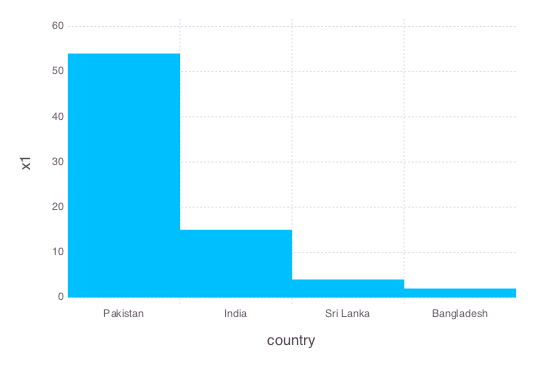

In [221]:
Gadfly.plot(results3, x = "country", y = "x1", Geom.bar)

In [222]:
?xtab

search: 

No documentation found.

**Summary:**

```julia
type DataArrays.xtab{T} <: Any
```

**Fields:**

```julia
vals   :: Array{T,N}
counts :: Array{Int64,1}
```


xtab xtabs isexecutable extrema ExactMannWhitneyUTest nextfloat



In [209]:
using PyPlot

In [213]:
PyPlot.plot(results3, :x1)

LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u'Illegal format string "x1"; two marker symbols',)
  File "/Users/arindambose/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3099, in plot
    ret = ax.plot(*args, **kwargs)
  File "/Users/arindambose/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 1373, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/Users/arindambose/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 304, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/Users/arindambose/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 263, in _plot_args
    linestyle, marker, color = _process_plot_format(tup[-1])
  File "/Users/arindambose/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 106, in _process_plot_format
    'Illegal format string "%s"; two marker symbols' % fmt)

while loading In[213], in expression starting on line 1

In [224]:
using DataArrays

In [226]:
?xtabs

search: 

No documentation found.

`DataArrays.xtabs` is a generic `Function`.

```julia
# 1 method for generic function "xtabs":
xtabs{T}(x::AbstractArray{T,N}) at /Users/arindambose/.julia/v0.4/DataArrays/src/statistics.jl:60
```


xtabs xtab isexecutable



In [227]:
mydata

,Gtdid,Date,country,city,perpetrator,fatalities,injured,attacktype,weapon
1,201404090005,2014-04-09,Pakistan,Islamabad,United Baloch Army (UBA),,,,
2,201403140027,2014-03-14,Pakistan,Saraband,Tehrik-i-Taliban Pakistan (TTP),13,50,Bombing/Explosion,Explosives/Bombs/Dynamite
3,201401210002,2014-01-21,Pakistan,Mastung district,Lashkar-e-Jhangvi,30,31,Bombing/Explosion,Explosives/Bombs/Dynamite
4,201308080011,2013-08-08,Pakistan,Quetta,Tehrik-i-Taliban Pakistan (TTP),39,50,Bombing/Explosion,Explosives/Bombs/Dynamite
5,201306300001,2013-06-30,Pakistan,Badaber,Tehrik-i-Taliban Pakistan (TTP),20,50,Bombing/Explosion,Explosives/Bombs/Dynamite
6,201306180001,2013-06-18,Pakistan,Mardan,Unknown,35,43,Bombing/Explosion,Explosives/Bombs/Dynamite
7,201305120011,2013-05-12,Pakistan,Quetta,Lashkar-e-Jhangvi,11,76,Assassination,Explosives/Bombs/Dynamite
8,201305070004,2013-05-06,Pakistan,Parachinar,Tehrik-i-Taliban Pakistan (TTP),23,70,Bombing/Explosion,Explosives/Bombs/Dynamite
9,201304290001,2013-04-29,Pakistan,Peshawar,Unknown,9,43,Bombing/Explosion,Explosives/Bombs/Dynamite
10,201304260001,2013-04-26,Pakistan,Karachi,Tehrik-i-Taliban Pakistan (TTP),11,40,Bombing/Explosion,Explosives/Bombs/Dynamite


In [230]:
xtab(mydata, "perpetrator", "city")

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{DataArrays.xtab{T}}, ::DataFrames.DataFrame, ::ASCIIString, ::ASCIIString)
This may have arisen from a call to the constructor DataArrays.xtab{T}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert{T}(::Type{T}, !Matched::T)
  DataArrays.xtab{T}(!Matched::Array{T,N}, !Matched::Array{Int64,1})
  ...
while loading In[230], in expression starting on line 1

In [231]:
Pkg.add("Stats")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Stats
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [232]:
using Stats

In [233]:
?reshape

search: 

```
reshape(A, dims)
```

Create an array with the same data as the given array, but with different dimensions. An implementation for a particular type of array may choose whether the data is copied or shared.


reshape promote_shape InverseWishart NormalInverseWishart



In [234]:
reshape(results2, 2)

LoadError: LoadError: MethodError: `reshape` has no method matching reshape(::DataFrames.DataFrame, ::Int64)
Closest candidates are:
  reshape(!Matched::AbstractArray{T,N}, ::Int64...)
while loading In[234], in expression starting on line 1

In [235]:
reshape(myvals, 2)

2-element Array{Any,1}:
 Any["Murkongselek","Charsadda","Mumbai","Parachinar","Vavuniya","Khar","Badaber","Dera Ghazi Khan","Multan","Hyderabad"  …  "Landi Kotal","Netrokona district","Karachi","Dera Ismail Khan","Mardan","Bajaur district","New Delhi","Peshawar","Barpeta","Sadiya"]
 [0.0133333,0.0133333,0.0133333,0.04,0.0133333,0.0133333,0.0266667,0.0266667,0.0133333,0.0266667  …  0.0133333,0.0133333,0.04,0.04,0.0133333,0.0133333,0.0133333,0.12,0.0133333,0.0133333]                                                                        

In [242]:
citystats = by(mydata, [:weapon], nrow)

,weapon,x1
1,,2
2,Explosives/Bombs/Dynamite,66
3,Firearms,6
4,Incendiary,1


In [243]:
using RDatasets

  likely near /Users/arindambose/.julia/v0.4/RDatasets/src/dataset.jl:1
  likely near /Users/arindambose/.julia/v0.4/RDatasets/src/dataset.jl:1
  likely near /Users/arindambose/.julia/v0.4/RDatasets/src/datasets.jl:1


In [244]:
iris = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa


In [245]:
names(iris)

5-element Array{Symbol,1}:
 :SepalLength
 :SepalWidth 
 :PetalLength
 :PetalWidth 
 :Species    

In [246]:
by(iris, :Species, size)

,Species,x1
1,setosa,"(50,5)"
2,versicolor,"(50,5)"
3,virginica,"(50,5)"


In [247]:
by(mydata, :country, size)

,country,x1
1,Pakistan,"(54,9)"
2,India,"(15,9)"
3,Sri Lanka,"(4,9)"
4,Bangladesh,"(2,9)"


In [259]:
by(mydata, :injury, sum)

LoadError: LoadError: KeyError: injury not found
while loading In[259], in expression starting on line 1

In [250]:
mydata[:injured]

75-element Array{Any,1}:
   ""
 50  
 31  
 50  
 50  
 43  
 76  
 70  
 43  
 40  
 60  
 58  
 58  
  ⋮  
 35  
 60  
 50  
 83  
 12  
 19  
 53  
   ""
 50  
 50  
 50  
 60  

In [253]:
median(mydata[:injured])

LoadError: LoadError: MethodError: `isless` has no method matching isless(::Int64, ::SubString{ASCIIString})
Closest candidates are:
  isless(::Real, !Matched::AbstractFloat)
  isless(::Real, !Matched::Real)
  isless(::Integer, !Matched::Char)
  ...
while loading In[253], in expression starting on line 1

In [252]:
by(iris, :Species, df -> mean(df[:PetalLength]))

,Species,x1
1,setosa,1.462
2,versicolor,4.260000000000001
3,virginica,5.5520000000000005


In [260]:
by(mydata, :country, size)

,country,x1
1,Pakistan,"(54,9)"
2,India,"(15,9)"
3,Sri Lanka,"(4,9)"
4,Bangladesh,"(2,9)"


In [261]:
aggregate(mydata, :country, sum )

LoadError: LoadError: MethodError: `+` has no method matching +(::SubString{ASCIIString}, ::SubString{ASCIIString})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
while loading In[261], in expression starting on line 1

In [262]:
names(mydata)

9-element Array{Symbol,1}:
 :Gtdid      
 :Date       
 :country    
 :city       
 :perpetrator
 :fatalities 
 :injured    
 :attacktype 
 :weapon     

In [263]:
typeof(mydata[:injured])

Array{Any,1}

In [265]:
by(iris, :Species, df -> DataFrame(N = size(df, 1)))

,Species,N
1,setosa,50
2,versicolor,50
3,virginica,50


In [266]:
by(iris, :Species) do df
   DataFrame(m = mean(df[:PetalLength]), s² = var(df[:PetalLength]))
end

,Species,m,s²
1,setosa,1.462,0.030159183673469387
2,versicolor,4.260000000000001,0.22081632653061226
3,virginica,5.5520000000000005,0.3045877551020408


In [270]:
aggregate(iris, :Species, mean)

,Species,SepalLength_mean,SepalWidth_mean,PetalLength_mean,PetalWidth_mean
1,setosa,5.006,3.428,1.462,0.24600000000000002
2,versicolor,5.936,2.77,4.260000000000001,1.3259999999999998
3,virginica,6.587999999999999,2.974,5.5520000000000005,2.026


In [279]:
for subdf in groupby(mydata, [:country, :city])
    println(size(subdf, 1))
end

6
1
1
5
2
1
3
9
3
3
1
1
1
1
5
2
1
1
2
1
1
1
1
1
2
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1


In [280]:
names(mydata)

9-element Array{Symbol,1}:
 :Gtdid      
 :Date       
 :country    
 :city       
 :perpetrator
 :fatalities 
 :injured    
 :attacktype 
 :weapon     

In [285]:
convert(UInt64, "injured")

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{UInt64}, ::ASCIIString)
This may have arisen from a call to the constructor UInt64(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert(::Type{UInt64}, !Matched::Int8)
  convert(::Type{UInt64}, !Matched::UInt8)
  ...
while loading In[285], in expression starting on line 1

In [286]:
typeof(mydata[:injured])

Array{Any,1}

In [287]:
summary(mydata[:injured])

"75-element Array{Any,1}"

In [288]:
summary(iris[:PetalLength])

"150-element DataArrays.DataArray{Float64,1}"

In [289]:
DataArray(mydata[:injured])

75-element DataArrays.DataArray{Any,1}:
   ""
 50  
 31  
 50  
 50  
 43  
 76  
 70  
 43  
 40  
 60  
 58  
 58  
  ⋮  
 35  
 60  
 50  
 83  
 12  
 19  
 53  
   ""
 50  
 50  
 50  
 60  

In [291]:
by(mydata, :country, df -> mean(mydata[:injured]))

LoadError: LoadError: MethodError: `+` has no method matching +(::SubString{ASCIIString}, ::Int64)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
  +(!Matched::Int64, ::Int64)
  +(!Matched::Complex{Bool}, ::Real)
  ...
while loading In[291], in expression starting on line 1

In [292]:
mydata

,Gtdid,Date,country,city,perpetrator,fatalities,injured,attacktype,weapon
1,201404090005,2014-04-09,Pakistan,Islamabad,United Baloch Army (UBA),,,,
2,201403140027,2014-03-14,Pakistan,Saraband,Tehrik-i-Taliban Pakistan (TTP),13,50,Bombing/Explosion,Explosives/Bombs/Dynamite
3,201401210002,2014-01-21,Pakistan,Mastung district,Lashkar-e-Jhangvi,30,31,Bombing/Explosion,Explosives/Bombs/Dynamite
4,201308080011,2013-08-08,Pakistan,Quetta,Tehrik-i-Taliban Pakistan (TTP),39,50,Bombing/Explosion,Explosives/Bombs/Dynamite
5,201306300001,2013-06-30,Pakistan,Badaber,Tehrik-i-Taliban Pakistan (TTP),20,50,Bombing/Explosion,Explosives/Bombs/Dynamite
6,201306180001,2013-06-18,Pakistan,Mardan,Unknown,35,43,Bombing/Explosion,Explosives/Bombs/Dynamite
7,201305120011,2013-05-12,Pakistan,Quetta,Lashkar-e-Jhangvi,11,76,Assassination,Explosives/Bombs/Dynamite
8,201305070004,2013-05-06,Pakistan,Parachinar,Tehrik-i-Taliban Pakistan (TTP),23,70,Bombing/Explosion,Explosives/Bombs/Dynamite
9,201304290001,2013-04-29,Pakistan,Peshawar,Unknown,9,43,Bombing/Explosion,Explosives/Bombs/Dynamite
10,201304260001,2013-04-26,Pakistan,Karachi,Tehrik-i-Taliban Pakistan (TTP),11,40,Bombing/Explosion,Explosives/Bombs/Dynamite


In [293]:
mydata2 = DataFrame(readdlm("wolfriver.csv", ','))

LoadError: LoadError: SystemError: opening file wolfriver.csv: No such file or directory
while loading In[293], in expression starting on line 1

In [294]:
pwd()

"/Users/arindambose/Documents/julia"

In [295]:
readdir()

13-element Array{ByteString,1}:
 ".ipynb_checkpoints"            
 "GTD-Export.csv"                
 "Tutorial.jl"                   
 "cofreewy.txt"                  
 "health.csv"                    
 "juliamaterials.ipynb"          
 "learnJlsanders.ipynb"          
 "learning.jl"                   
 "learningJulia.ipynb"           
 "myplot.png"                    
 "terrorism-analysis-julia.ipynb"
 "testing.jl"                    
 "tryingjulia.ipynb"             

In [302]:
mydata2 = DataFrame(readcsv("health.csv"))
mydata2 = deleterows!(mydata2, 1)

,x1,x2,x3,x4,x5
1,Kalangala,0,11,11,13
2,Kampala,0,200,200,250
3,Kayunga,0,21,23,54
4,Kiboga,0,37,40,40
5,Luwero,0,57,67,77
6,Lyantonde,0,9,19,28
7,Masaka,0,80,80,77
8,Mityana,0,44,52,55
9,Mpigi,0,59,64,64
10,Mubende,0,51,56,56


In [303]:
describe(mydata2)

x1
Length  80
Type    Any
NAs     0
NA%     0.0%
Unique  80

x2
Length  80
Type    Any
NAs     0
NA%     0.0%
Unique  2

x3
Length  80
Type    Any
NAs     0
NA%     0.0%
Unique  45

x4
Length  80
Type    Any
NAs     0
NA%     0.0%
Unique  46

x5
Length  80
Type    Any
NAs     0
NA%     0.0%
Unique  52



In [305]:
mean(mydata2[:x2])

0.125

In [319]:
by(mydata2, :x3, df1 -> mean(mydata2[:x4]))

,x3,x1
1,11,40.475
2,200,40.475
3,21,40.475
4,37,40.475
5,57,40.475
6,9,40.475
7,80,40.475
8,44,40.475
9,59,40.475
10,51,40.475


In [321]:
a = 3; 
a < 5 && println("small")
a > 5 && println("large")

small


false

In [324]:
a <= 10 ? println("hello") : println("not")

hello


In [326]:
@which ^

Base

In [327]:
mymat = [2 1 1 1]

1x4 Array{Int64,2}:
 2  1  1  1

In [328]:
w = [1,1]

2-element Array{Int64,1}:
 1
 1

In [331]:
M = reshape([2.0, 1, 1, 1], (2,2))

2x2 Array{Float64,2}:
 2.0  1.0
 1.0  1.0

In [332]:
Pkg.add("Lapack")

LoadError: LoadError: unknown package Lapack
 in error at /Applications/Julia-0.4.1.app/Contents/Resources/julia/lib/julia/sys.dylib
 [inlined code] from pkg/entry.jl:49
 in anonymous at task.jl:447
while loading In[332], in expression starting on line 1

In [334]:
Pkg.add("lapack")

LoadError: LoadError: unknown package lapack
 in error at /Applications/Julia-0.4.1.app/Contents/Resources/julia/lib/julia/sys.dylib
 [inlined code] from pkg/entry.jl:49
 in anonymous at task.jl:447
while loading In[334], in expression starting on line 1

In [335]:
?writedlm

search: 

```
writedlm(f, A, delim='\\t')
```

Write `A` (a vector, matrix or an iterable collection of iterable rows) as text to `f` (either a filename string or an `IO` stream) using the given delimeter `delim` (which defaults to tab, but can be any printable Julia object, typically a `Char` or `AbstractString`).

For example, two vectors `x` and `y` of the same length can be written as two columns of tab-delimited text to `f` by either `writedlm(f, [x y])` or by `writedlm(f, zip(x, y))`.


writedlm



In [337]:
writedlm("mydata2.csv", mydata2)

LoadError: LoadError: MethodError: `data` has no method matching data(::DataFrames.DataFrame)
while loading In[337], in expression starting on line 1

In [338]:
?writecsv

search: 

```
writecsv(filename, A)
```

Equivalent to `writedlm` with `delim` set to comma.


writecsv



In [339]:
writecsv("mydata2.csv", mydata2)

LoadError: LoadError: MethodError: `data` has no method matching data(::DataFrames.DataFrame)
while loading In[339], in expression starting on line 1

In [340]:
writecsv(mydata2.csv, mydata2)

LoadError: LoadError: type DataFrame has no field csv
while loading In[340], in expression starting on line 1

In [345]:
writetable("mydata2.csv", mydata2)


In [346]:
readdir()

14-element Array{ByteString,1}:
 ".ipynb_checkpoints"            
 "GTD-Export.csv"                
 "Tutorial.jl"                   
 "cofreewy.txt"                  
 "health.csv"                    
 "juliamaterials.ipynb"          
 "learnJlsanders.ipynb"          
 "learning.jl"                   
 "learningJulia.ipynb"           
 "mydata2.csv"                   
 "myplot.png"                    
 "terrorism-analysis-julia.ipynb"
 "testing.jl"                    
 "tryingjulia.ipynb"             

In [347]:
1.0
nextfloat(ans)

LoadError: LoadError: MethodError: `nextfloat` has no method matching nextfloat(::Array{ByteString,1})
while loading In[347], in expression starting on line 2

In [348]:
1.0

1.0

In [349]:
nextfloat(ans)

1.0000000000000002

In [350]:
describe(mydata)

Gtdid
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  75

Date
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  70

country
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  4

city
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  42

perpetrator
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  12

fatalities
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  33

injured
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  27

attacktype
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  7

weapon
Length  75
Type    Any
NAs     0
NA%     0.0%
Unique  4



In [351]:
summary(mydata[:injured])

"75-element Array{Any,1}"